In [5]:
# Mohammad Hossein Zehtab
# Machine-Learning-Fridays
# Wine_Binary_Classification_Project

# Importing Libraries

In [6]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import dtreeviz

# Importing Sklean tools and algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

# Warning handling
import warnings
warnings.filterwarnings("ignore")

# Reading Wine Dataset

In [7]:
wine = pd.read_csv("winequality.csv")
wine.shape

(6497, 13)

In [8]:
df = wine.copy()
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Wine Dataset Preprocessing

## Wine Dataframe Information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


**Insight**
- There are 6497 data samples in wine dataframe.
- There are 12 numeric features plus one non-numeric target ("type").
- Missing values can be seen and needs to be handled.
- Because of various data range for each feature, data scaling should be done.

## Assigning More Convenient Feature and Data Name

In [10]:
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6085,red,7.0,0.43,0.30,2.0,0.085,6.0,39.0,0.99346,3.33,0.46,11.9,6
2807,white,7.5,0.18,0.72,9.6,0.039,53.0,151.0,0.99802,3.03,0.46,8.9,5
1787,white,7.2,0.26,0.30,2.1,0.033,50.0,158.0,0.99090,3.33,0.43,12.1,7
5370,red,12.5,0.37,0.55,2.6,0.083,25.0,68.0,0.99950,3.15,0.82,10.4,6
1590,white,7.9,0.14,0.74,1.2,0.028,30.0,165.0,0.99100,3.08,0.82,12.3,6


In [11]:
# Renaming feature names and target name for easier applience
rename_required_features = {
    "fixed acidity" : "fixed_acidity",
    "volatile acidity" : "volatile_acidity",
    "citric acid" : "citric_acid",
    "residual sugar" : "residual_sugar",
    "free sulfur dioxide" : "free_sulfur_dioxide",
    "total sulfur dioxide" : "total_sulfur_dioxide",
    "type" : "is_red"
}
df1 = df.rename(columns=rename_required_features)
df1.tail()

,is_red,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [12]:
# Replacing types of wine with 0 (for white) and 1 (for red) (Binary encoding)
df2 = df1.replace({"white":0, "red":1})
df2.head(5)

,is_red,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Handling Missing Values

In [13]:
# Total number of missing values
df2.isnull().sum().sum()

38

In [14]:
# Catching rows with missing values
mask = df2.isnull().any(axis=1)
df2.query(expr="@mask == True")

,is_red,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
17,0,NaN,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
33,0,6.2,0.120,0.34,NaN,0.045,43.0,117.0,0.99390,3.42,0.51,9.0,6
54,0,6.8,0.200,0.59,0.9,0.147,38.0,132.0,0.99300,NaN,0.38,9.1,6
86,0,7.2,NaN,0.63,11.0,0.044,55.0,156.0,0.99740,3.09,0.44,8.7,6
98,0,9.8,0.360,0.46,10.5,NaN,4.0,83.0,0.99560,2.89,0.30,10.1,4
139,0,8.1,0.280,0.39,1.9,0.029,18.0,79.0,0.99230,NaN,0.52,11.8,6
174,0,NaN,0.270,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5
224,0,6.3,0.495,0.22,1.8,0.046,31.0,140.0,0.99290,3.39,NaN,10.4,6
249,0,NaN,0.410,0.14,10.4,0.037,18.0,119.0,0.99600,3.38,0.45,10.0,5
267,0,NaN,0.580,0.07,6.9,0.043,34.0,149.0,0.99440,3.34,0.57,9.7,5


In [15]:
# Filling the NaN values with mean of each column
df3 = df2.copy()
features = df2.columns.tolist()
for feature in features:
    df3[feature].fillna(value=df3[feature].mean(), inplace=True)

In [16]:
# Checking if filling the missing values is done correctly
round(df3.loc[33, "residual_sugar"], 2) == round(df3["residual_sugar"].mean(), 2)

True

In [17]:
# Checking if there are any missing values
df3.isnull().sum().sum()

0

## Handling Duplicated Rows

In [18]:
# Number of duplicated rows
df3.duplicated().sum()

1168

In [19]:
# Deleting duplicated rows
df4 = df3.drop_duplicates()
df4.shape

(5329, 13)

## Handling Outliers

### Plotting Box Plots

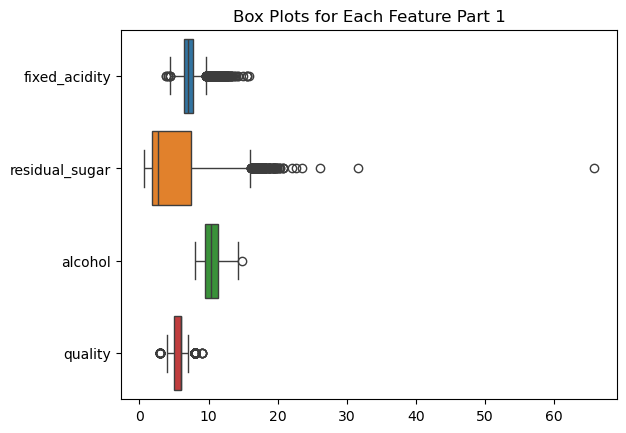

In [20]:
# Box plots for each feature as a general view part 1
plt.title("Box Plots for Each Feature Part 1")
sns.boxplot(data=df4.iloc[:, [1, 4, 11, 12]], orient="h")
plt.show()

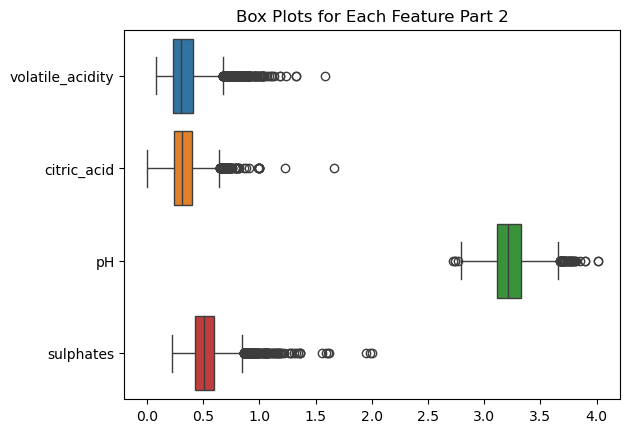

In [21]:
# Box plots for each feature as a general view part 2
plt.title("Box Plots for Each Feature Part 2")
sns.boxplot(data=df4.iloc[:, [2, 3, 9, 10]], orient="h")
plt.show()

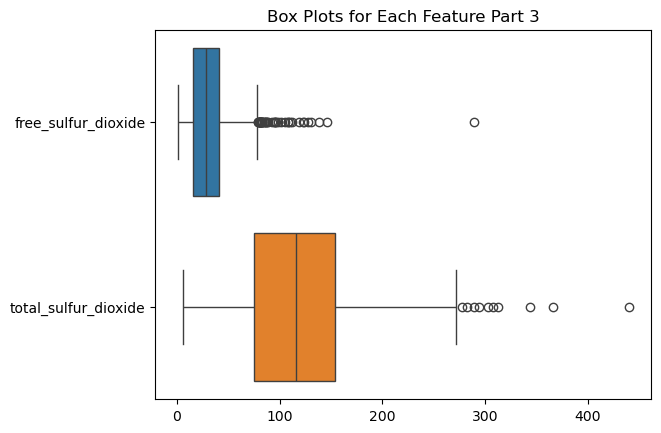

In [22]:
# Box plots for each feature as a general view part 3
plt.title("Box Plots for Each Feature Part 3")
sns.boxplot(data=df4.iloc[:, [6, 7]], orient="h")
plt.show()

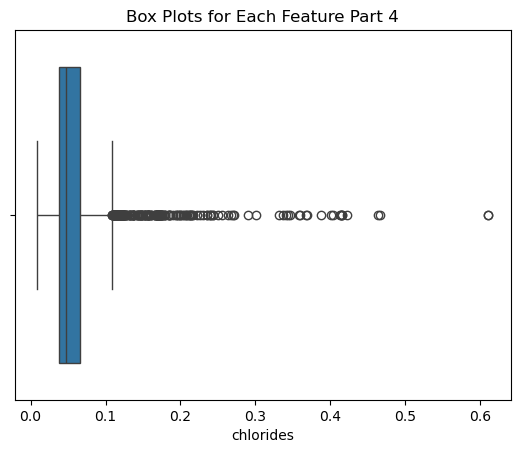

In [23]:
# Box plots for each feature as a general view part 4
plt.title("Box Plots for Each Feature Part 4")
sns.boxplot(data=df4.iloc[:, 5], orient="h")
plt.show()

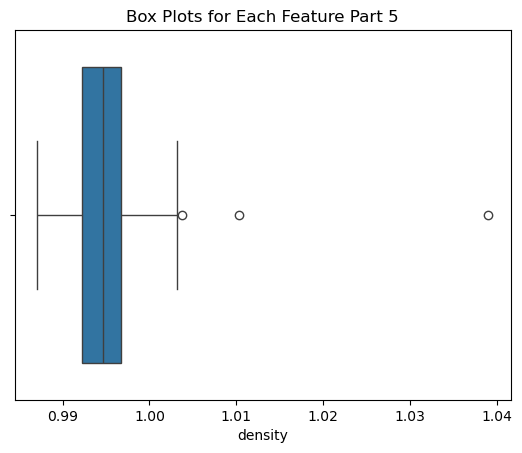

In [24]:
# Box plots for each feature as a general view part 5
plt.title("Box Plots for Each Feature Part 5")
sns.boxplot(data=df4.iloc[:, 8], orient="h")
plt.show()

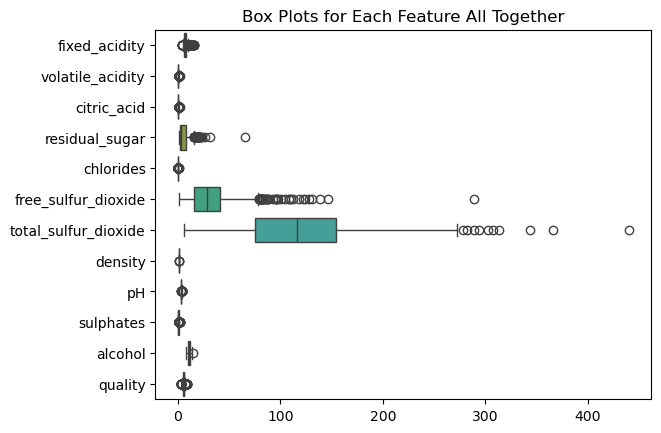

In [25]:
# Box plots for each feature as a general view all together
plt.title("Box Plots for Each Feature All Together")
sns.boxplot(data=df4.iloc[:, 1:], orient="h")
plt.show()

### Outlier Detection Using Zscore

In [26]:
# Turning feature values into zscore values
zscores = [stats.zscore(df4[feature]) for feature in df4.columns[1:]]
len(zscores), type(zscores)

(12, list)

In [27]:
df4.columns.tolist()

['is_red',
 'fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [28]:
# Outliers for each feature using zscore
zscore_fixed_acidity = df4[np.abs(zscores[0]) > 3]
zscore_volatile_acidity = df4[np.abs(zscores[1]) > 3]
zscore_citric_acid = df4[np.abs(zscores[2]) > 3]
zscore_residual_sugar = df4[np.abs(zscores[3]) > 3]
zscore_chlorides = df4[np.abs(zscores[4]) > 3]
zscore_free_sulfur_dioxide = df4[np.abs(zscores[5]) > 3]
zscore_total_sulfur_dioxide = df4[np.abs(zscores[6]) > 3]
zscore_density = df4[np.abs(zscores[7]) > 3]
zscore_pH = df4[np.abs(zscores[8]) > 3]
zscore_sulphates = df4[np.abs(zscores[9]) > 3]
zscore_alcohol = df4[np.abs(zscores[10]) > 3]
zscore_quality = df4[np.abs(zscores[11]) > 3]
outlier_indices_using_zscore = pd.concat([zscore_fixed_acidity, zscore_volatile_acidity, zscore_citric_acid,
                                         zscore_residual_sugar, zscore_chlorides, zscore_free_sulfur_dioxide,
                                         zscore_total_sulfur_dioxide, zscore_density, zscore_pH, zscore_sulphates,
                                         zscore_alcohol, zscore_quality], axis=0)
outlier_indices_using_zscore.shape

(517, 13)

### Outlier Detection Using 3*Sigma Based on Normal Distribution

In [29]:
# Outlier indices using 3*sigma based on normal distribution
def find_outlier_index_using_3sigma(dataframe) -> list:
    '''
    Finding outlier indices using 3*sigma based on normal distribution.
    '''
    features = df4.columns[1:].tolist()
    labels = df4["is_red"].unique().tolist()

    outlier_index_3sigma = list()
    for feature in features:
        for label in labels:
            df_type = dataframe.query("is_red == @label")
            selected_column = df_type[feature]
            
            mu = selected_column.mean()
            sigma = selected_column.std()
            lower_limit = mu - 3 * sigma
            upper_limit = mu + 3 * sigma
            
            mask = (selected_column < lower_limit)|(selected_column > upper_limit)
            outliers = selected_column[mask]
            outlier_indices = outliers.index
            # print(outlier_indices)    Debugging
            
            if len(outlier_indices) == 0: continue
            # print(f"{feature:15},\t{label:15},\t outlier indices={outlier_indices.values}")    #Debugging
            outlier_index_3sigma.extend(outlier_indices)
            
    return outlier_index_3sigma

### Driver Code ###
outlier_indices_using_3sigma = find_outlier_index_using_3sigma(df4)
print("\nNumber of outlier indices using 3sigma:", len(outlier_indices_using_3sigma))


Number of outlier indices using 3sigma: 564


### Outlier Detection Using IQR

In [30]:
# Outlier indices using iqr
def find_outlier_index_using_iqr(dataframe) -> list:
    '''
    Finding outlier indices using iqr.
    '''
    features = df4.columns[1:].tolist()
    labels = df4["is_red"].unique().tolist()

    outlier_index_iqr = list()
    for feature in features:
        for label in labels:
            df_type = dataframe.query("is_red == @label")
            selected_column = df_type[feature]
            
            q1 = selected_column.quantile(0.25)    # First quartile
            q3 = selected_column.quantile(0.75)    # Third quartile
            iqr = q3 - q1
            lower_limit = q1 - 1.5 * iqr
            upper_limit = q3 + 1.5 * iqr
            
            mask = (selected_column < lower_limit)|(selected_column > upper_limit)
            outliers = selected_column[mask]
            outlier_indices = outliers.index
            
            if len(outlier_indices) == 0: continue
            # print(f"{feature:15},\t{label:15},\t outlier indices={outlier_indices.values}")    #Debugging
            outlier_index_iqr.extend(outlier_indices)
            
    return outlier_index_iqr

### Driver Code ###
outlier_indices_using_iqr = find_outlier_index_using_iqr(df4)
print("\nNumber of outlier indices using iqr:", len(outlier_indices_using_iqr))


Number of outlier indices using iqr: 1529


### Dropping Common Outliers

In [31]:
# Turning outlier list into set and obtaining intersection of the sets
final_outlier_indices = set(outlier_indices_using_3sigma) & set(outlier_indices_using_iqr) & set(outlier_indices_using_zscore.index)
print("Number of final outlier indices:", len(final_outlier_indices))

Number of final outlier indices: 233


In [32]:
# Dropping outliers
df5 = df4.drop(index=final_outlier_indices)
df5.shape

(5096, 13)

## Scaling Data

In [33]:
df5.sample(10)

,is_red,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
6322,1,8.3,0.260,0.37,1.4,0.076,8.0,23.0,0.99740,3.26,0.70,9.6,6
4683,0,6.5,0.330,0.32,1.0,0.041,39.0,120.0,0.99004,3.06,0.37,12.2,6
1828,0,7.3,0.170,0.23,6.3,0.051,35.0,240.0,0.99630,3.36,0.54,10.0,6
4484,0,5.8,0.555,0.26,4.5,0.053,17.0,126.0,0.99430,3.24,0.46,9.1,5
807,0,6.2,0.290,0.26,13.1,0.046,55.0,204.0,0.99745,3.16,0.41,9.6,6
135,0,6.7,0.270,0.31,15.7,0.036,44.0,179.0,0.99790,3.26,0.56,9.6,5
4298,0,5.6,0.260,0.00,10.2,0.038,13.0,111.0,0.99315,3.44,0.46,12.4,6
487,0,6.6,0.340,0.28,1.3,0.035,32.0,90.0,0.99160,3.10,0.42,10.7,6
5833,1,8.8,0.300,0.38,2.3,0.060,19.0,72.0,0.99543,3.39,0.72,11.8,6
2392,0,6.4,0.170,0.34,1.5,0.091,42.0,135.0,0.99380,3.25,0.49,9.6,7


In [34]:
# Scaling the whole wine dataframe using 'StandardScaler'
df6 = df5.copy()
standard_scaler = StandardScaler()
feature_column_list = df6.columns[1:].tolist()
scaled_array = standard_scaler.fit_transform(df6[feature_column_list])
df6[feature_column_list] = scaled_array
df6.tail()

,is_red,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
6491,1,-0.312758,1.741422,-1.682961,-0.716734,0.611279,-0.100186,-1.356133,0.712318,1.268805,2.184635,-0.899443,0.212143
6492,1,-0.787717,1.617213,-1.682961,-0.693827,1.533024,0.141679,-1.248560,0.151679,1.463541,0.392096,-0.053652,-0.961670
6493,1,-1.025197,1.306690,-1.539653,-0.648014,0.359894,0.564943,-1.123059,0.228288,1.917924,0.027726,0.538401,0.212143
6495,1,-1.025197,1.896683,-1.396345,-0.693827,0.904561,0.141679,-1.248560,0.350166,2.242483,1.363054,-0.307390,-0.961670
6496,1,-0.946037,-0.183818,1.111540,-0.327323,0.569381,-0.704848,-1.284418,0.357131,1.074070,0.989609,0.369243,0.212143


## Spliting Data into Train and Test Datasets

In [35]:
# Copying the last dataframe into 'df_clean'
df_clean = df6.copy()
df_clean.sample(5)

,is_red,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5064,1,-0.312758,1.865631,-1.539653,-0.670921,1.323536,-0.704848,-0.226621,0.395435,0.749511,-0.056039,-0.307390,-0.961670
4415,0,-0.708558,-0.214871,-0.679806,2.513085,0.317996,-0.221118,0.490529,1.314743,-0.938197,-0.205417,-1.237760,-0.961670
852,0,-0.233599,-0.991177,0.323348,-0.854173,-0.729441,0.625409,0.060239,-0.370655,0.295128,3.155593,-0.899443,1.385957
1662,0,-0.391918,-0.804864,1.254848,-0.831266,-0.268569,0.020747,0.006452,-1.067100,-1.976786,-0.802930,0.200085,1.385957
5945,1,-0.075279,0.561436,-1.038076,-0.739640,1.197844,-0.160652,-1.123059,0.653120,1.723188,0.840231,-0.138232,-0.961670


In [36]:
# Creating feature matrix X
X = df_clean.drop(columns="is_red")
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1,-0.708558,-0.245923,0.180040,-0.785453,-0.184774,-0.946713,0.329170,-0.161721,0.489863,-0.280106,-0.899443,0.212143
2,0.716319,-0.370132,0.609963,0.428592,-0.142876,0.020747,-0.298336,0.221324,0.230216,-0.653551,-0.391969,0.212143
3,0.003881,-0.680655,0.036732,0.795096,0.192304,1.048672,1.297323,0.395435,-0.224167,-0.952308,-0.561127,0.212143
6,-0.787717,-0.121714,-1.109730,0.451498,-0.352364,0.020747,0.400885,0.151679,-0.289079,-0.429484,-0.814864,0.212143
9,0.716319,-0.742759,0.824925,-0.808360,-0.394261,-0.100186,0.275384,-0.231366,-0.029431,-0.578862,0.369243,0.212143


In [37]:
# Creating target vector y
y = df_clean["is_red"]
y.head()

1    0
2    0
3    0
6    0
9    0
Name: is_red, dtype: int64

In [38]:
print(f"X Dimension = {X.shape}")
print(f"y Dimension = {y.shape}")

X Dimension = (5096, 12)
y Dimension = (5096,)


In [39]:
# Converting X and y to numpy array for easier computations
X = X.to_numpy()
y = y.to_numpy()

In [40]:
# Spliting Data to train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train Dimension = ", X_train.shape)
print("X_test Dimension = ", X_test.shape)
print("y_train Dimension = ", y_train.shape)
print("y_test Dimension = ", y_test.shape)

X_train Dimension =  (4076, 12)
X_test Dimension =  (1020, 12)
y_train Dimension =  (4076,)
y_test Dimension =  (1020,)


# Creating Binary Classification Model Using Logistic Regression

## Building Binary Logistic Regression Model

In [41]:
# Creating logistic regression object
logistic_regression = LogisticRegression()

In [42]:
# Fitting logistic regression object on train dataset
logistic_regression.fit(X_train, y_train)

LogisticRegression()

## Testing Model on a New Data

In [43]:
# Testing model on the 999th index of test dataset
index = 999
actual_type = y_test[index]
# print(X_test[index])    #Debugging
predicted_type = logistic_regression.predict([X_test[index]])
print(f"Is the actual type of the data with index of {index} 'red'? {bool(actual_type)}")
print(f"Is the predicted type of the data with index of {index} 'red'? {bool(predicted_type[0])}")

Is the actual type of the data with index of 999 'red'? True
Is the predicted type of the data with index of 999 'red'? True


## Model Evaluation

### Calculating Model Score

In [44]:
# Accuracy score of the model
y_true = y_test
y_pred = logistic_regression.predict(X_test)
print(f"Accuracy score of the model is = {round(metrics.accuracy_score(y_true, y_pred) * 100, 2)}%")

Accuracy score of the model is = 99.31%


### Creating Confusion Matrix

In [45]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_true, y_pred)

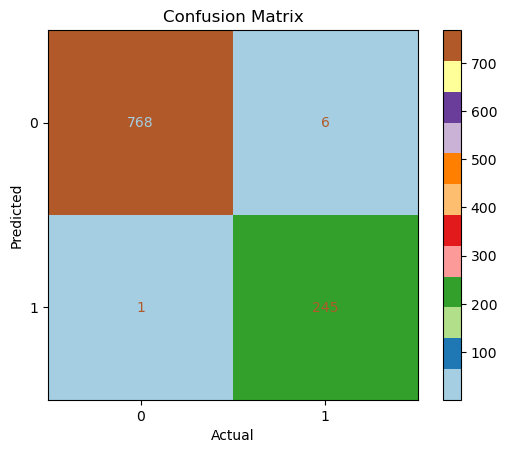

In [46]:
# Styling confusion matrix
display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix.T)
display.plot(cmap=plt.cm.Paired)
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

### Classification Report

In [47]:
reports = metrics.classification_report(y_true, y_pred)
print(reports)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       769
           1       1.00      0.98      0.99       251

    accuracy                           0.99      1020
   macro avg       0.99      0.99      0.99      1020
weighted avg       0.99      0.99      0.99      1020



### Plotting ROC Curve

In [48]:
# Predicting probabilities for the test dataset
predicted_probs = logistic_regression.predict_proba(X_test)
negative_probs = predicted_probs[:, 0]
positive_probs = predicted_probs[:, 1]

In [49]:
# Generating ROC curve data
FPR, TPR, thresholds = metrics.roc_curve(y_true=y_true, y_score=positive_probs)

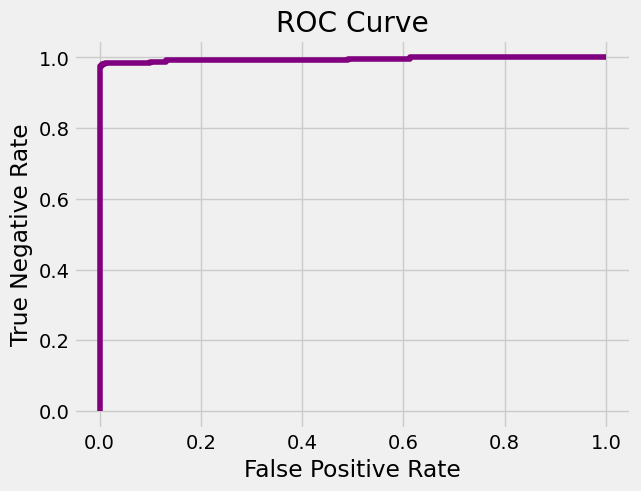

In [50]:
# Plotting ROC curve
plt.style.use("fivethirtyeight")
plt.plot(FPR, TPR, color="purple")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Negative Rate")
plt.show()

**Conclusion**
  
The binary logistic regression classification model with the accuracy score of 99% works PERFECTLY!

# Creating Multiclass Neural Network Model Using MLP

## Building MLP Model

In [51]:
# Building 'mlpclassifire' object
mlp = MLPClassifier(hidden_layer_sizes=(100,),
                    activation="relu",
                    solver="sgd",
                    random_state=42,
                    max_iter=200,
                    learning_rate_init=0.1)

In [52]:
# Fitting 'mlp' on train data
mlp.fit(X_train, y_train)

MLPClassifier(learning_rate_init=0.1, random_state=42, solver='sgd')

## Testing MLP Model on New Data

In [53]:
# 'Mlp' prediction on test data
y_pred_mlp = mlp.predict(X_test)

In [54]:
# Testing model on the 854th index of test dataset for mlp model
# Labeling wine type function
def label_wine_type(x):
    return "White" if x==0 else "Red"

index_mlp = 854    
actual_type_mlp = y_test[index_mlp]
predicted_type_mlp = y_pred_mlp[index_mlp]
print(f"Actual type of the data with index of {index_mlp} is: {label_wine_type(actual_type_mlp)}")
print(f"Predicted type of the data with index of {index_mlp} is: {label_wine_type(predicted_type_mlp)}")

Actual type of the data with index of 854 is: White
Predicted type of the data with index of 854 is: White


## MLP Model Evaluation

### Calculating MLP Model Score

In [55]:
# Accuracy Score for mlp model
y_true_mlp = y_test
print(f"Accuracy score of the mlp model is: {metrics.accuracy_score(y_true_mlp, y_pred_mlp) * 100:.2f}")

Accuracy score of the mlp model is: 99.31


### Creating Confusion Matrix for MLP Model

In [56]:
# Confusion matrix for mlp model
confusion_matrix_mlp = metrics.confusion_matrix(y_true_mlp, y_pred_mlp)

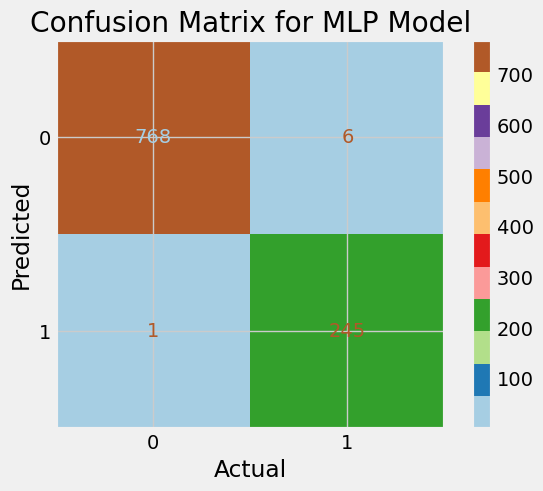

In [57]:
# Styling confusion matrix for mlp model
display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_mlp.T)
display.plot(cmap=plt.cm.Paired)
plt.title("Confusion Matrix for MLP Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

### Plotting Epochs vs Loss Curve for MLP Model

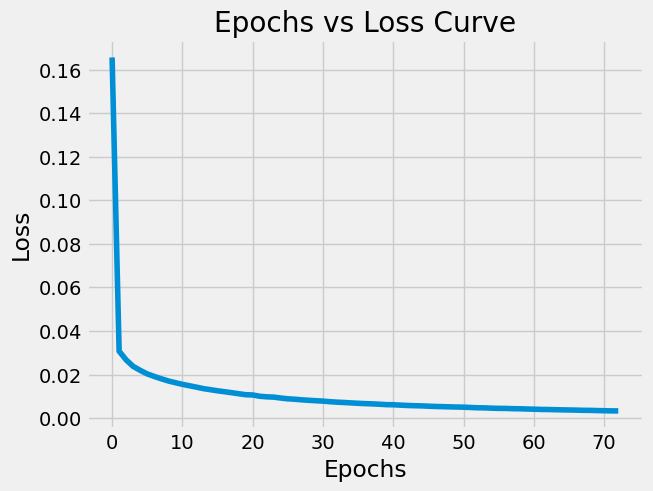

In [58]:
# Plotting epochs vs loss curve
plt.plot(mlp.loss_curve_)
plt.title("Epochs vs Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

### Classification Report for MLP Model

In [59]:
# Classification report for mlp model
report_mlp = metrics.classification_report(y_true_mlp, y_pred_mlp)
print(report_mlp)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       769
           1       1.00      0.98      0.99       251

    accuracy                           0.99      1020
   macro avg       0.99      0.99      0.99      1020
weighted avg       0.99      0.99      0.99      1020



**Conclusion**

The multiclass neural network model using mlp with the accuracy score of 99% works PERFECTLY!

# Creating KNN Classification Model

## Building KNN Model

In [60]:
# Building 'KNeighborsClassifier' object
knn = KNeighborsClassifier(n_neighbors=3)

In [61]:
# Fitting 'knn' on the train data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Testing KNN Model on New Data

In [62]:
# Knn prediction on test data
y_pred_knn = knn.predict(X_test)

In [63]:
# Testing knn model on the 901st index of test dataset
# Labeling wine type function
def label_wine_type(x):
    return "White" if x==0 else "Red"

index_knn = 901
actual_type_knn = y_test[index_knn]
predicted_type_knn = y_pred_mlp[index_knn]
print(f"Actual type of the data with index of {index_knn} is: {label_wine_type(actual_type_knn)}")
print(f"Predicted type of the data with index of {index_knn} is: {label_wine_type(predicted_type_knn)}")

Actual type of the data with index of 901 is: Red
Predicted type of the data with index of 901 is: Red


## KNN Model Evaluation

### Calculating KNN Model Score

In [64]:
# Accuracy Score for knn model
y_true_knn = y_test
print(f"Accuracy score of the knn model is: {metrics.accuracy_score(y_true_knn, y_pred_knn) * 100:.2f}")

Accuracy score of the knn model is: 99.22


### Optimizing Hyper Parameter of k using K-Fold Cross Validation for KNN Model

In [65]:
# Creating list of odd Ks
k_list = list(range(1, 50, 2))
cross_validation_scores = []

# Performing 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='accuracy')
    cross_validation_scores.append(scores.mean())

In [66]:
# Finding best k
the_best_k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print("The Optimal Number of Neighbors is %d." % the_best_k)

The Optimal Number of Neighbors is 7.


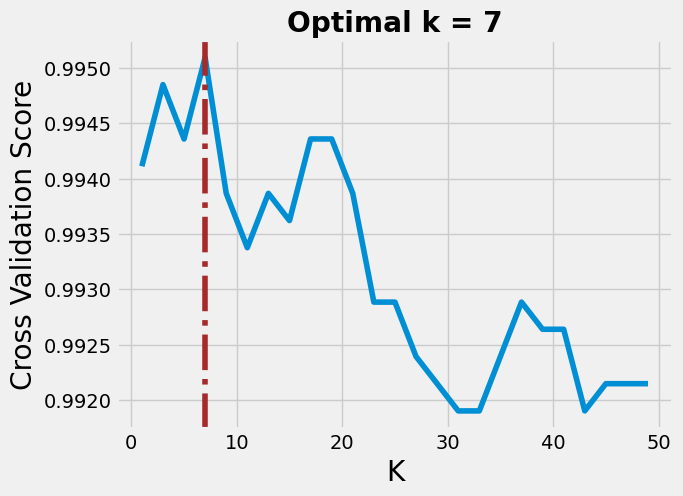

In [67]:
# Plotting k vs cross validation scores
plt.plot(k_list, cross_validation_scores)
plt.title(f"Optimal k = {the_best_k}", weight="bold")
plt.xlabel("K", size="x-large")
plt.ylabel("Cross Validation Score", size="x-large")
plt.axvline(x=the_best_k, color="brown", ls="-.")
plt.show()

**Insight**

When we go back and train the model based on k=7, we get accuracy score of 99.12 for test data; Which is less than score of the model with k=3. So we consider k=3 for training the model.

### Creating Confusion Matrix for the KNN Model

In [68]:
# Confusion matrix for knn model
confusion_matrix_knn = metrics.confusion_matrix(y_true_knn, y_pred_knn)

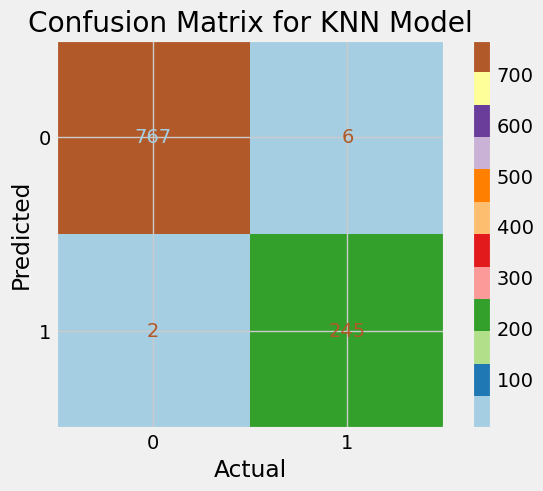

In [69]:
# Styling confusion matrix for knn model
display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_knn.T)
display.plot(cmap=plt.cm.Paired)
plt.title("Confusion Matrix for KNN Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

### KNN Classification Report

In [70]:
# Classification report for knn model
report_knn = metrics.classification_report(y_true_knn, y_pred_knn)
print(report_knn)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       769
           1       0.99      0.98      0.98       251

    accuracy                           0.99      1020
   macro avg       0.99      0.99      0.99      1020
weighted avg       0.99      0.99      0.99      1020



**Conclusion**

The KNN classification model with the accuracy score of 99% works PERFECTLY!

# Creating Decision Tree Classification Model

## Building Decision Tree Model

In [71]:
# Building decision tree classifier object
dtclf = DecisionTreeClassifier()

In [72]:
# Fitting decision tree classifier object on train dataset
dtclf.fit(X_train, y_train)

DecisionTreeClassifier()

## Testing Decision Tree Model on New Data

In [73]:
# Decision tree model prediction on test dataset
y_pred_dt = dtclf.predict(X_test)

In [74]:
# Testing decision tree model on the 645th index of test dataset
# Labeling wine type function
def label_wine_type(x):
    return "White" if x==0 else "Red"

index_dt = 645
actual_type_dt = y_test[index_dt]
predicted_type_dt = y_pred_dt[index_dt]
print(f"Actual type of the data with index of {index_dt} is: {label_wine_type(actual_type_dt)}")
print(f"Predicted type of the data with index of {index_dt} is: {label_wine_type(predicted_type_dt)}")

Actual type of the data with index of 645 is: White
Predicted type of the data with index of 645 is: White


## Visualizing the Decision Tree of the Model

In [75]:
# Representing decision tree of the model as text
feature_names = df_clean.columns.tolist()[1:]
text_representation = export_text(dtclf, feature_names=feature_names, class_names=["White", "Red"])
print(text_representation)

|--- chlorides <= 0.34
|   |--- total_sulfur_dioxide <= -1.07
|   |   |--- chlorides <= -0.62
|   |   |   |--- density <= 0.10
|   |   |   |   |--- class: White
|   |   |   |--- density >  0.10
|   |   |   |   |--- class: Red
|   |   |--- chlorides >  -0.62
|   |   |   |--- sulphates <= -0.54
|   |   |   |   |--- citric_acid <= -1.36
|   |   |   |   |   |--- class: Red
|   |   |   |   |--- citric_acid >  -1.36
|   |   |   |   |   |--- class: White
|   |   |   |--- sulphates >  -0.54
|   |   |   |   |--- class: Red
|   |--- total_sulfur_dioxide >  -1.07
|   |   |--- volatile_acidity <= 2.92
|   |   |   |--- sulphates <= 2.07
|   |   |   |   |--- total_sulfur_dioxide <= 2.89
|   |   |   |   |   |--- pH <= 2.92
|   |   |   |   |   |   |--- total_sulfur_dioxide <= -0.86
|   |   |   |   |   |   |   |--- density <= 0.43
|   |   |   |   |   |   |   |   |--- class: White
|   |   |   |   |   |   |   |--- density >  0.43
|   |   |   |   |   |   |   |   |--- total_sulfur_dioxide <= -0.99
|   |   

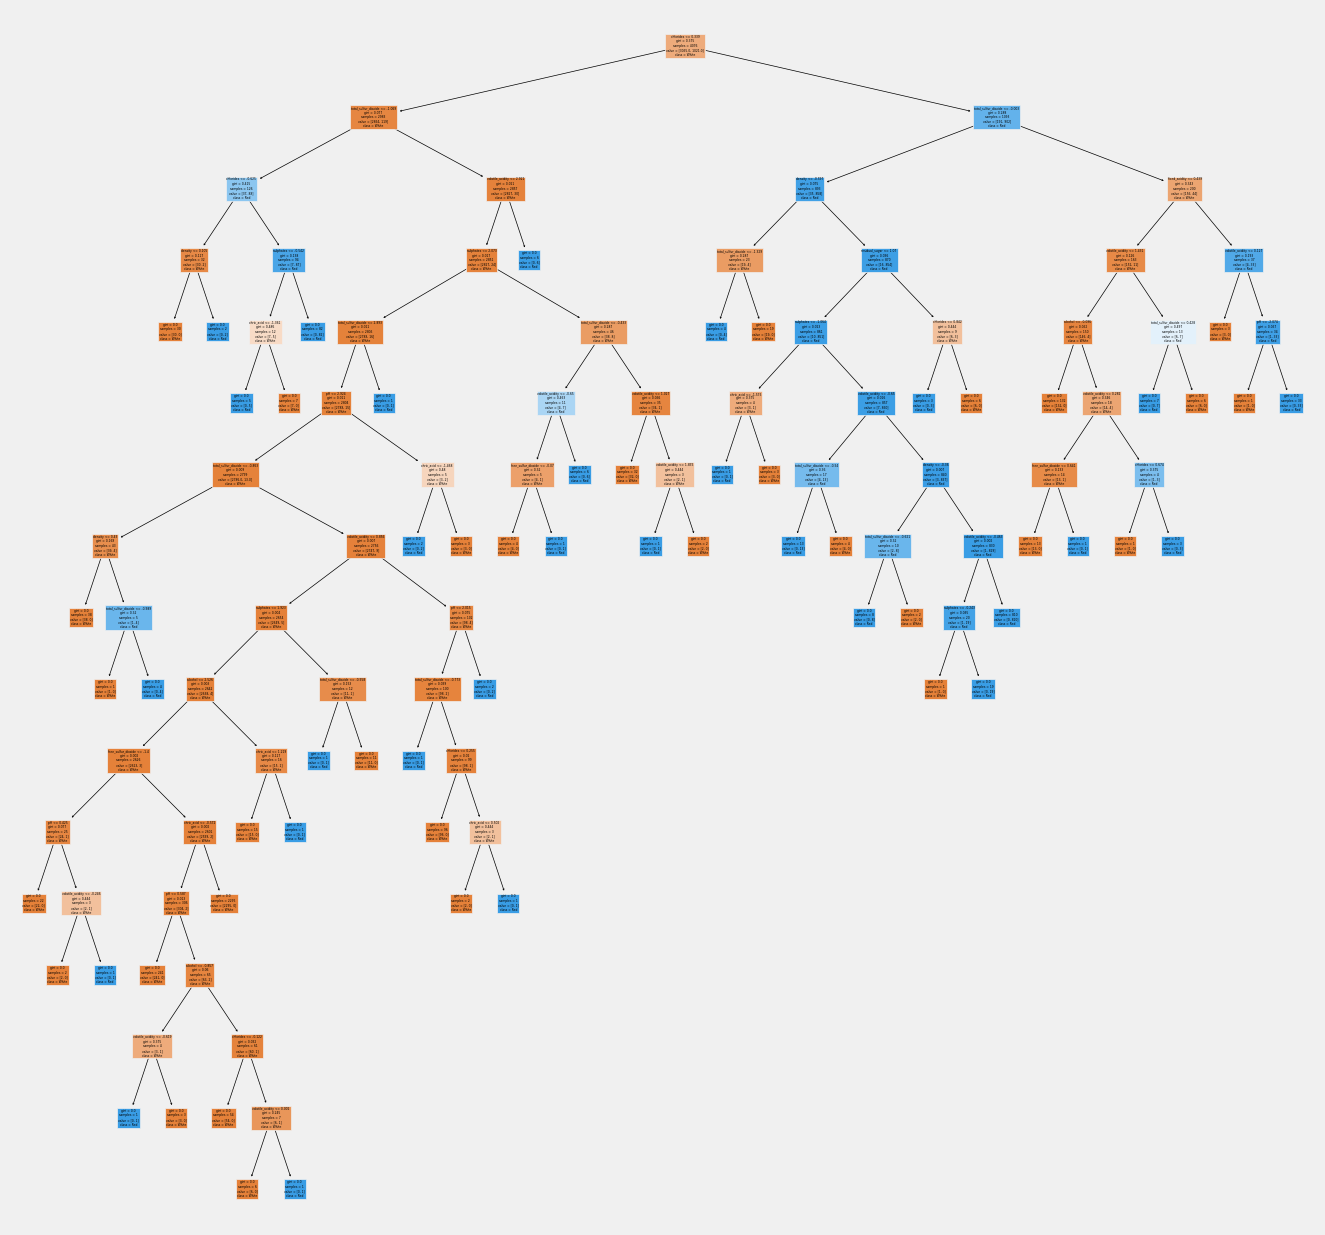

In [76]:
# Visualization of decision tree usning 'plot_tree'
fig = plt.figure(figsize=[15, 15])
_ = plot_tree(dtclf, 
              feature_names=feature_names,
              class_names=["White", "Red"], 
              filled=True)

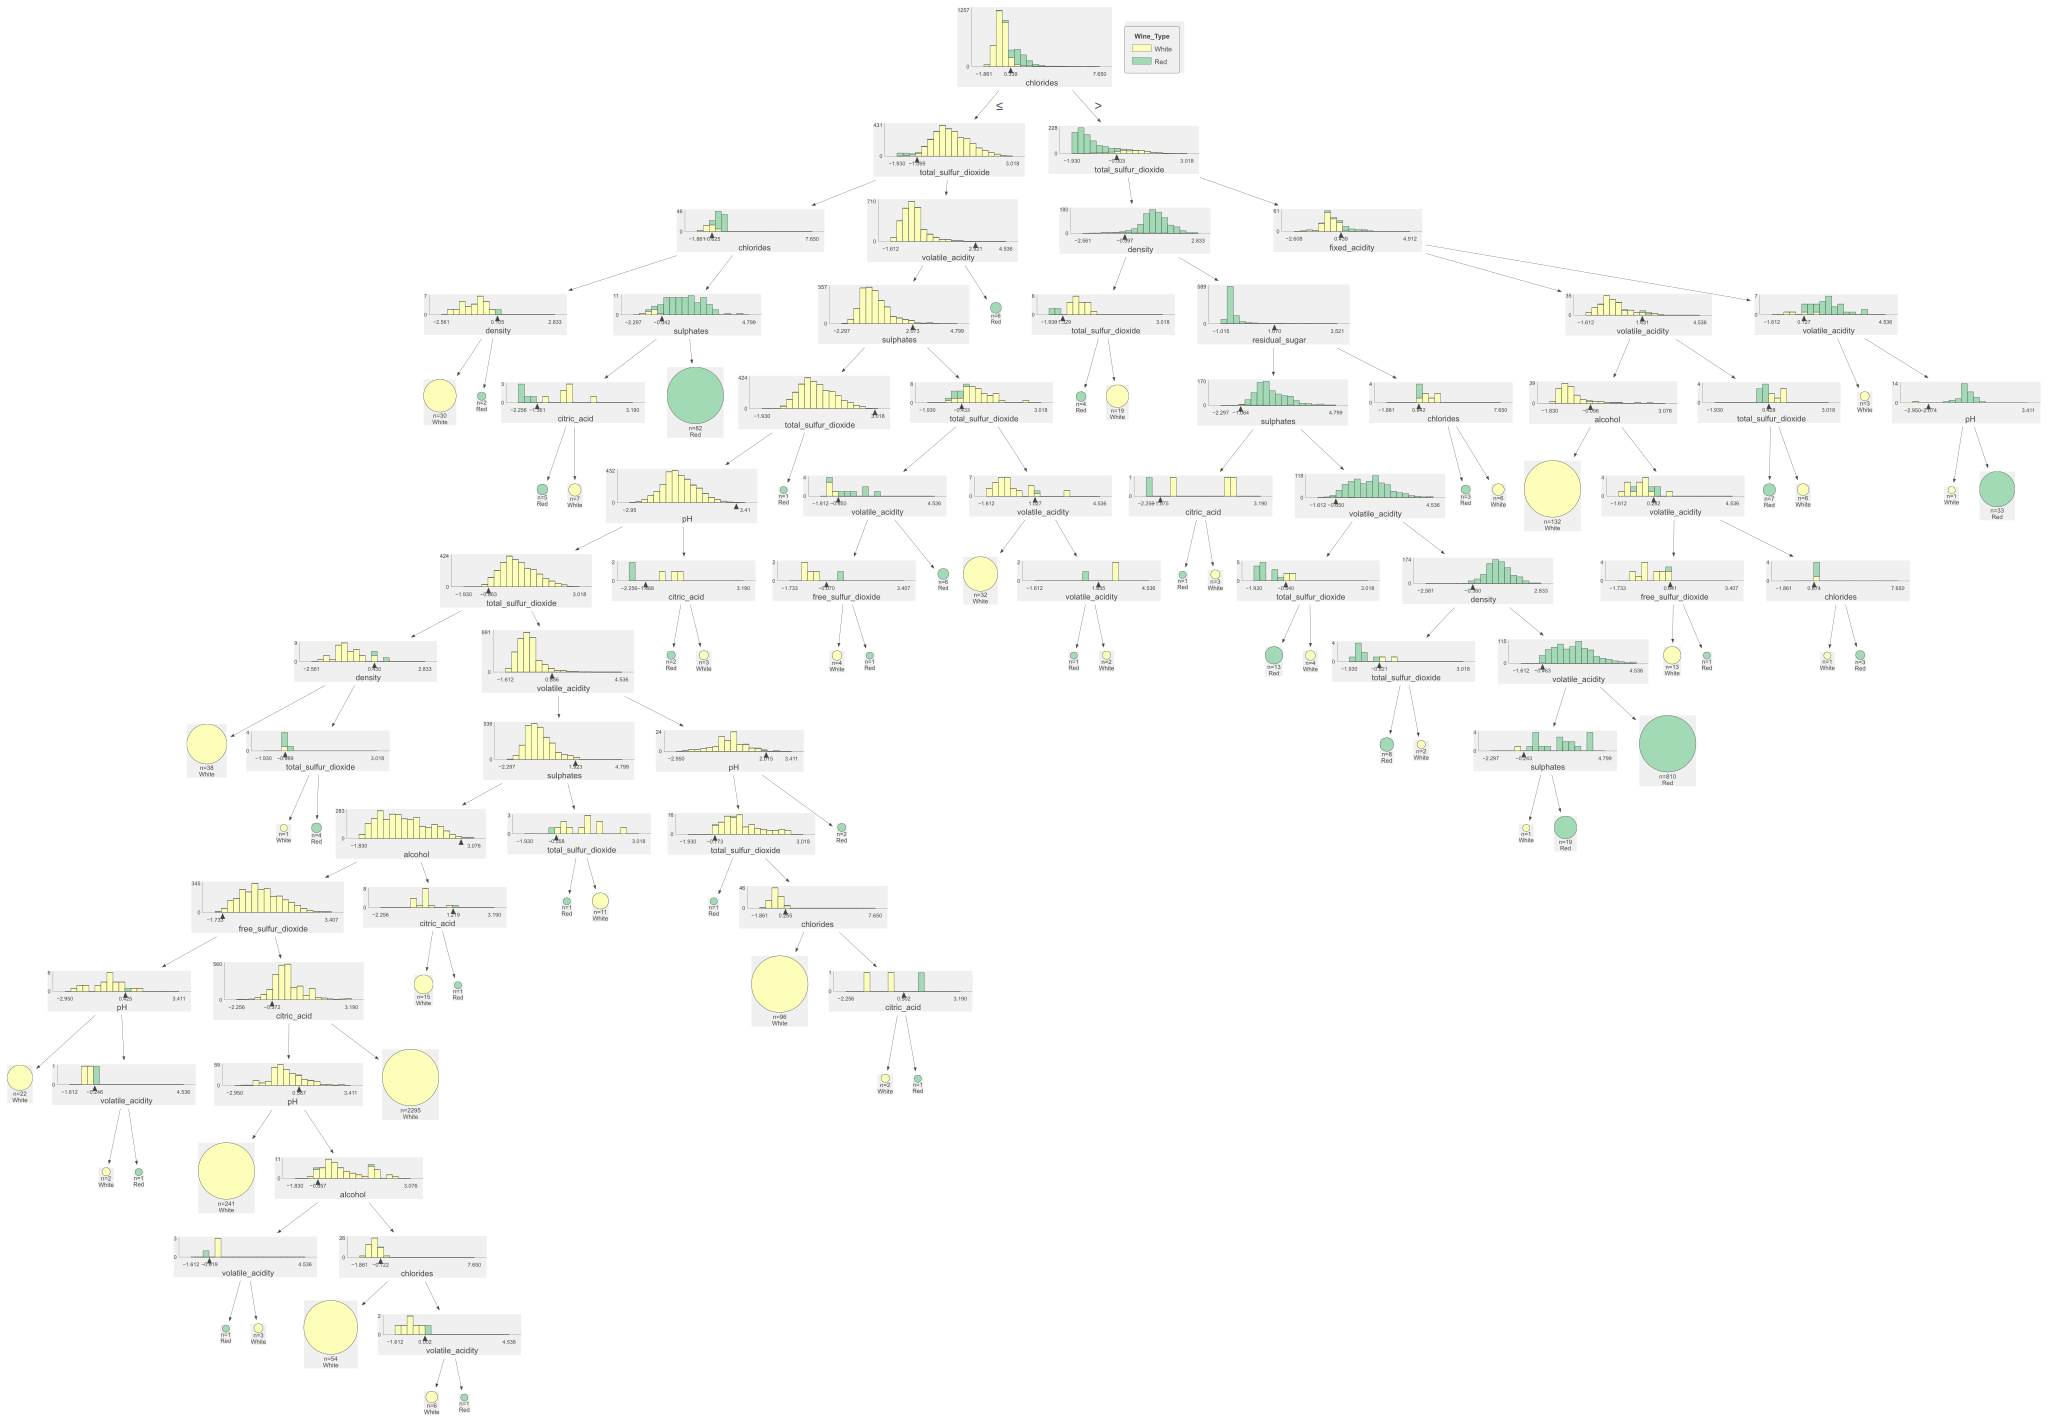

In [77]:
# Visualization of the decision tree using 'dtreeviz'
dtviz = dtreeviz.model(dtclf, 
                       X_train, 
                       y_train, 
                       feature_names=feature_names, 
                       target_name="Wine_Type", 
                       class_names=["White", "Red"])
dtviz.view()

## Decision Tree Model Evaluation

### Calculating Decision Tree Model Score

In [78]:
# Accuracy Score for decision tree model
y_true_dt = y_test
print(f"Accuracy score of the decision tree model is: {metrics.accuracy_score(y_true_dt, y_pred_dt) * 100:.2f}")

Accuracy score of the decision tree model is: 97.94


### Creating Confusion Matrix for the Decision Tree Model

In [79]:
# Creating confusion matrix
confusion_matrix_dt = metrics.confusion_matrix(y_true_dt, y_pred_dt)

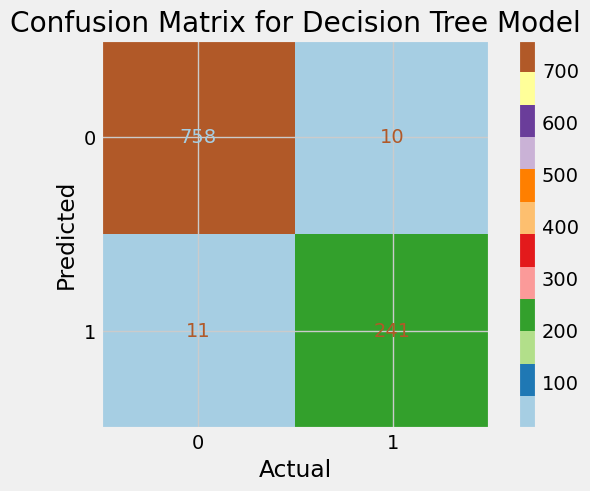

In [80]:
# Styling confusion matrix for decision tree model
display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt.T)
display.plot(cmap=plt.cm.Paired)
plt.title("Confusion Matrix for Decision Tree Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

### Decision Tree Classification Report

In [81]:
# Decision tree classification report
report_dt = metrics.classification_report(y_true_dt, y_pred_dt)
print(report_dt)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       769
           1       0.96      0.96      0.96       251

    accuracy                           0.98      1020
   macro avg       0.97      0.97      0.97      1020
weighted avg       0.98      0.98      0.98      1020



**Conclusion**

The decision tree classification model with the accuracy score of 98% works PERFECTLY!

# Creating Random Forest Classification Model

## Building Random Forest Model

In [82]:
# Building random forest classifier object
rfclf = RandomForestClassifier(random_state=42)

In [83]:
# Fitting random forest classifier object on train dataset
rfclf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Testing Random Forest Model on New Data

In [84]:
# Random forest model prediction on test dataset
y_pred_rf = rfclf.predict(X_test)

In [85]:
# Testing random forest model on the 65th index of test dataset
# Labeling wine type function
def label_wine_type(x):
    return "White" if x==0 else "Red"

index_rf = 65
actual_type_rf = y_test[index_rf]
predicted_type_rf = y_pred_dt[index_rf]
print(f"Actual type of the data with index of {index_rf} is: {label_wine_type(actual_type_rf)}")
print(f"Predicted type of the data with index of {index_rf} is: {label_wine_type(predicted_type_rf)}")

Actual type of the data with index of 65 is: White
Predicted type of the data with index of 65 is: White


## Random Forest Model Evaluation

### Calculating Random Forest Model Score

In [86]:
# Accuracy score of random forest model
y_true_rf = y_test
print(f"Accuracy score of the random forest model is: {metrics.accuracy_score(y_true_rf, y_pred_rf) * 100:.2f}")

Accuracy score of the random forest model is: 99.02


### Creating Confusion Matrix for the Random Forest Model

In [88]:
# Creating confusion matrix
confusion_matrix_rf = metrics.confusion_matrix(y_true_rf, y_pred_rf)

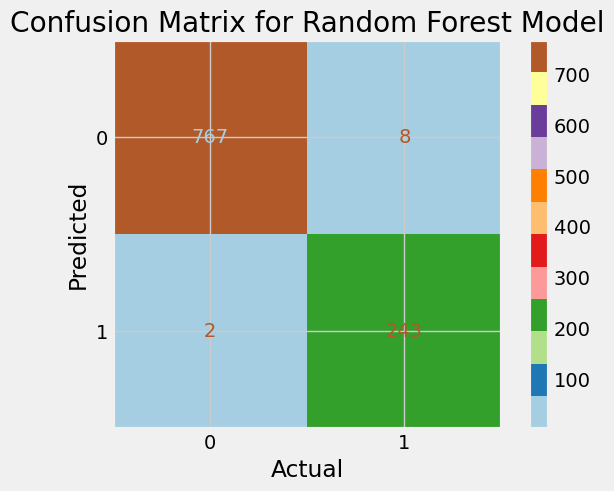

In [89]:
# Styling confusion matrix for random forest model
display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf.T)
display.plot(cmap=plt.cm.Paired)
plt.title("Confusion Matrix for Random Forest Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

### Random Forest Classification Report

In [90]:
# Random forest classification report
classification_report_rf = metrics.classification_report(y_true_rf, y_pred_rf)
print(classification_report_rf)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       769
           1       0.99      0.97      0.98       251

    accuracy                           0.99      1020
   macro avg       0.99      0.98      0.99      1020
weighted avg       0.99      0.99      0.99      1020



**Conclusion**

The random forest classification model with the accuracy score of 99% works PERFECTLY!

# Final Conclusion

After applying 5 methods of classification, the accuracy score results are as follows:
- The accuracy score of binary logistic regression classification model is 99%.
- The accuracy score of multiclass neural network model using mlp is 99%.
- The accuracy score of KNN classification model is 99%.
- The accuracy score of decision tree classification model is 98%.
- The accuracy score of random forest classification model is 99%.

So to conclude, each of the methods above has the best performance for training of Wine dataset.